# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE

In [ ]:

# Drop the rows with missing values
data.dropna(inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
data['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
# Drop the "name" column
data.drop(['name'], axis=1, inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2
#data['origin']=data['origin'].apply(lambda x: '0' if x=='usa' elif ('1' if x=='japan' else '2')).copy()
data['origin']= data['origin'].replace(['usa', 'japan', 'europe'], [0,1,2])
data['origin'].unique()

array([0, 1, 2])

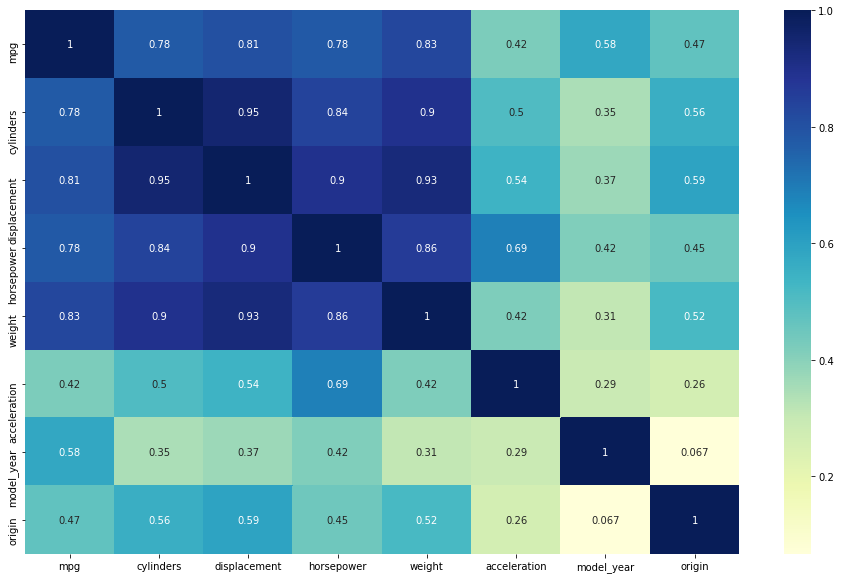

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr().abs(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE
X = data[['cylinders','displacement','horsepower', 'weight', 'acceleration', 'model_year', 'origin']] 
y = data['mpg'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)


In [ ]:
# Fit a decision tree
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
model1=modelDTR.fit(X_train, y_train)

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE
predictions=model1.predict(X_test)
predictions

array([23. , 20. , 31. , 33. , 27. , 29. , 12. , 31.5, 18. , 31. , 15. ,
       18. , 17.5, 29. , 17. , 27. , 18. , 32.3, 31.3, 34. , 23. , 36. ,
       31. , 17. , 31. , 28. , 19. , 18. , 26. , 25. , 16. , 20.2, 23.9,
       28. , 14. , 31. , 10. , 23. , 14. , 12. , 14. , 28. , 34. , 25. ,
       16. , 11. , 19. , 44.3, 25. , 33. , 14. , 21. , 21. , 34. , 38. ,
       16. , 19. , 19. , 24. , 23. , 11. , 20.5, 28.8, 22. , 23.9, 26. ,
       25.5, 33. , 23.9, 14. , 25. , 14. , 23.8, 19. , 20.5, 24. , 13. ,
       17. , 24. ])

In [ ]:
# Print out the R2 score
# INSERT CODE HERE
newmodel = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))


Score for the Train dataset : 0.8229144278736205
Score for the Test dataset : 0.7924340895411552


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
model1.feature_importances_

array([0.0037974 , 0.62925651, 0.17312386, 0.06424391, 0.02373387,
       0.10329246, 0.00255198])

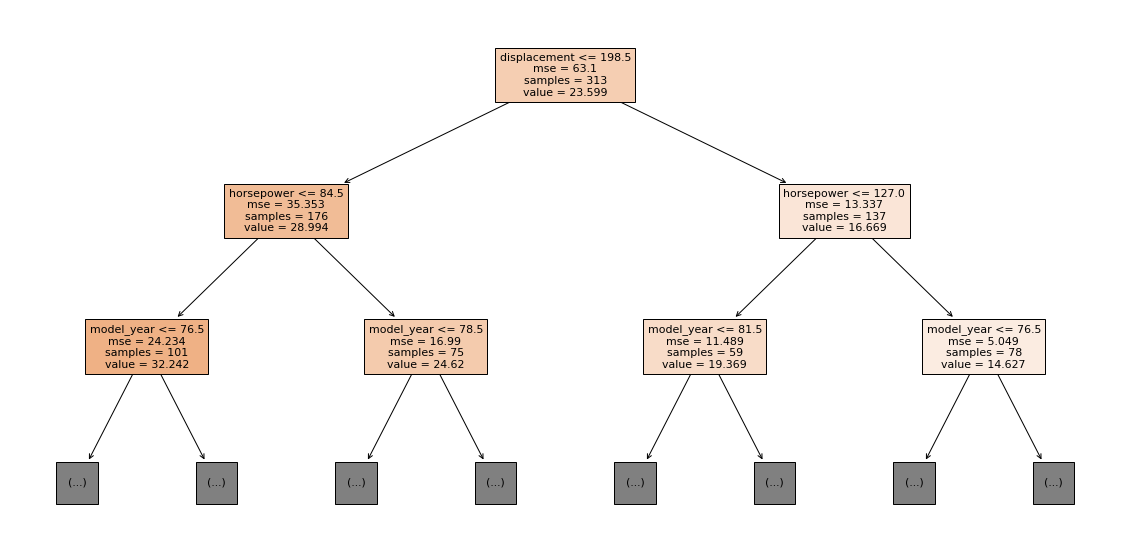

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(model1, filled = True,  
          feature_names=X_train.columns, max_depth = 2 )
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data1 = sns.load_dataset('penguins')
data1.head()


# Turn the island column into numeric
# Specificall, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
data1['island'].unique()
# Turn the island column into numeric
# Specificall, Torgersen = 0, Biscoe = 1, Dream = 2
data1['island']= data1['island'].replace(['Torgersen', 'Biscoe', 'Dream'], [0,1,2])
data1['island'].unique()


array([0, 1, 2])

In [ ]:
# Drop rows with missing values
data1.dropna(inplace=True)
data1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,Male
1,Adelie,0,39.5,17.4,186.0,3800.0,Female
2,Adelie,0,40.3,18.0,195.0,3250.0,Female
4,Adelie,0,36.7,19.3,193.0,3450.0,Female
5,Adelie,0,39.3,20.6,190.0,3650.0,Male


In [ ]:
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
data1['species']= data1['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0,1,2])
data1['species'].unique()



array([0, 1, 2])

In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE
X = data1[['species','island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] 
y = data1['sex'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [ ]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Print the predictions on the test set
# INSERT CODE HERE
predictions1=modelDTC.predict(X_test)
predictions1

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
# INSERT CODE HERE
print("\nScore for the Train dataset :", modelDTC.score(X_train, y_train))
print("Score for the Test dataset :", modelDTC.score(X_test, y_test))


Score for the Train dataset : 1.0
Score for the Test dataset : 0.8805970149253731


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
modelDTC.feature_importances_

array([0.00451766, 0.        , 0.08880664, 0.49683554, 0.01957654,
       0.39026362])

In [ ]:
accuracy_score(y_test, modelDTC.predict(X_test))

0.8805970149253731

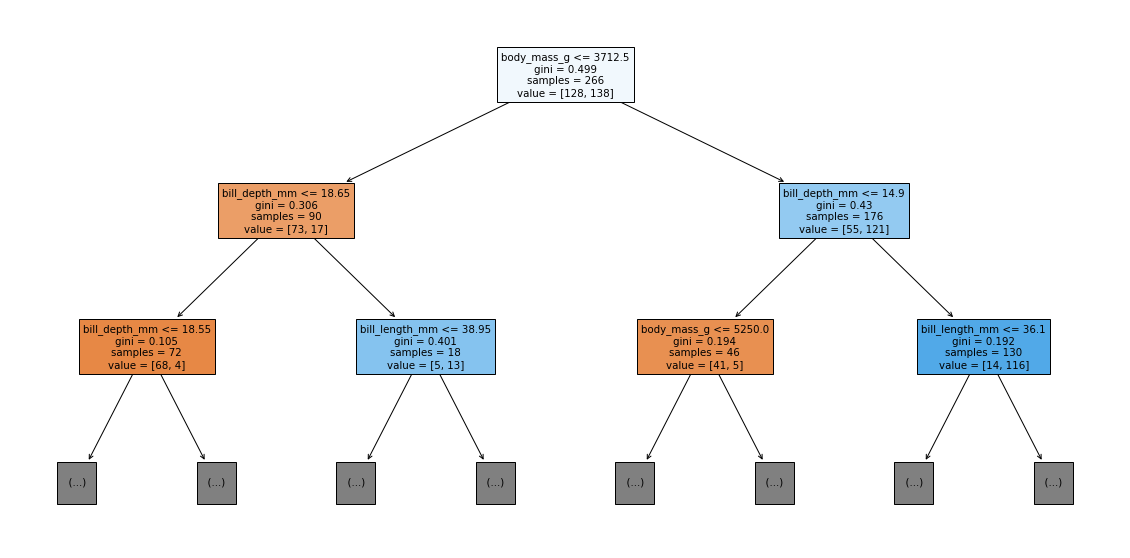

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(modelDTC, filled = True,  
          feature_names=X_train.columns, max_depth = 2 )
plt.show()


[texte du lien](https:// [texte du lien](https:// [texte du lien](https://)))# Effects of Chaning the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

To be explicit, changing any hyperparameter is not done after looking at the results of the test set!!*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
X = data1[['species','island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] 
y = data1['sex'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80, shuffle = True)

list_of_accuracies = []

for i in range(1, 11):
  
  modelDTC = DecisionTreeClassifier(max_depth =i)
  modelDTC.fit(X_train, y_train)
  list_of_accuracies.append(modelDTC.score(X_test, y_test))
list_of_accuracies

  # INSERT CODE HERE


[0.7014925373134329,
 0.8208955223880597,
 0.835820895522388,
 0.8656716417910447,
 0.8507462686567164,
 0.8507462686567164,
 0.835820895522388,
 0.8805970149253731,
 0.8507462686567164,
 0.835820895522388]

<function matplotlib.pyplot.show>

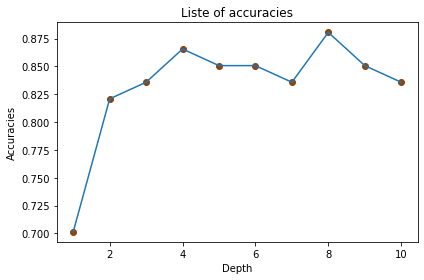

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
axeX=[x for x in range(1,11)]
plt.scatter(x=axeX,y=list_of_accuracies, color='saddlebrown')
plt.plot(range(1,11),list_of_accuracies)
plt.xlabel ('Depth')
plt.ylabel ('Accuracies')
plt.title('Liste of accuracies')
plt.tight_layout()
plt.show
